In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import sys 
import seaborn as sns
from scipy.stats import beta, gamma, norm, lognorm, expon, kstest, shapiro, anderson, cramervonmises, moment

In [20]:
path = 'C:\\Users\\joanb\\Desktop\\data_incendios\\clima\\raw\\GVA\\'

In [21]:
os.listdir(path)

['data_Alzira.txt', 'data_Artana.txt', 'data_Llutxent.txt', 'data_Montan.txt']

In [22]:
fechas = [
    ('2016-06-01', '2016-08-31'),
    ('2016-06-01', '2016-08-31'),
    ('2018-06-01', '2018-08-31'),
    ('2015-06-01', '2015-08-31'),
]

data_Alzira.txt
data_Artana.txt
data_Llutxent.txt
data_Montan.txt


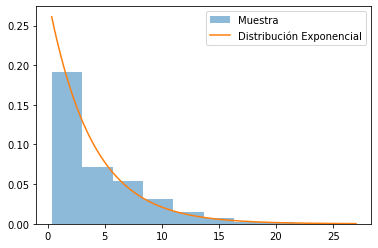

Test de Kolmogorov-Smirnov para la distribución : KS statistic = 0.207, p-value = 0.000
Test de Shapiro-Wilk para la distribución : W = 0.844, p-value = 0.000
Test de Anderson-Darling para la distribución : A2 = 161.965
15.0% Nivel de Significación: 0.150, Valor Crítico: 0.922 => Se rechaza la hipótesis nula
10.0% Nivel de Significación: 0.100, Valor Crítico: 1.078 => Se rechaza la hipótesis nula
5.0% Nivel de Significación: 0.050, Valor Crítico: 1.341 => Se rechaza la hipótesis nula
2.5% Nivel de Significación: 0.025, Valor Crítico: 1.606 => Se rechaza la hipótesis nula
1.0% Nivel de Significación: 0.010, Valor Crítico: 1.957 => Se rechaza la hipótesis nula
Test de Cramér-von Mises para la distribución : W2 = 60.554, p-value = 0.000


c:\Users\joanb\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:

# Crear una lista para almacenar los datos
sample = []

for i, file in enumerate(os.listdir(path)):
    
    print(file)
    df = pd.read_csv(path + file, sep="\t", encoding='ISO-8859-1')    
    df['Fecha'] = pd.to_datetime(df['FECHA'], format='%d/%m/%Y')
    inicio, fin = fechas[i]
    df = df[(df['Fecha']>= inicio) & (df['Fecha']<= fin)]
    df['Veloc.'] = df['Veloc.'].astype('str').str.replace(',', '.').astype('float')
    sample.extend(df['Veloc.'].to_list())

# Convertir la lista en un arreglo de NumPy y eliminar los valores NaN
sample = 3.6* np.array(sample, dtype='float')
sample = sample[~np.isnan(sample)]

# Ajustar una distribución exponencial a la muestra
params_exp = expon.fit(sample)

# Crear un histograma de la muestra
plt.hist(sample, density=True, alpha=0.5, label='Muestra')

# Crear una línea que representa la distribución ajustada
x = np.linspace(sample.min(), sample.max(), 100)
y = expon.pdf(x, *params_exp)
plt.plot(x, y, label='Distribución Exponencial')

# Agregar una leyenda al gráfico
plt.legend()

# Mostrar el gráfico
plt.show()

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(sample, 'expon', args=params_exp)
print("Test de Kolmogorov-Smirnov para la distribución : KS statistic = {:.3f}, p-value = {:.3f}".format(ks_statistic, p_value))

# Realizar la prueba de Shapiro-Wilk
sw_statistic, p_value = shapiro(sample)
print('Test de Shapiro-Wilk para la distribución : W = {:.3f}, p-value = {:.3f}'.format(sw_statistic, p_value))

# Realizar la prueba de Anderson-Darling
ad_statistic, critical_values, significance_level = anderson(sample, dist='expon')
print('Test de Anderson-Darling para la distribución : A2 = {:.3f}'.format(ad_statistic))
for i in range(len(critical_values)):
    sl, cv = significance_level[i], critical_values[i]
    if ad_statistic < cv:
        print('%.1f%% Nivel de Significación: %.3f, Valor Crítico: %.3f => No se puede rechazar la hipótesis nula'%(sl, sl/100, cv))
    else:
        print('%.1f%% Nivel de Significación: %.3f, Valor Crítico: %.3f => Se rechaza la hipótesis nula'%(sl, sl/100, cv))

# Realizar la prueba de Cramér-von Mises
result = cramervonmises(sample, expon.cdf, args=params_exp)
cv_statistic = result.statistic
p_value = result.pvalue
print('Test de Cramér-von Mises para la distribución : W2 = {:.3f}, p-value = {:.3f}'.format(cv_statistic, p_value))


data_Alzira.txt
data_Artana.txt
data_Llutxent.txt
data_Montan.txt


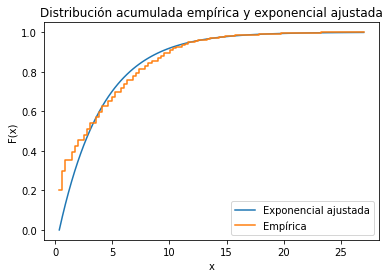

In [24]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

sample = []

for i, file in enumerate(os.listdir(path)):
    
    print(file)
    df = pd.read_csv(path + file, sep="\t", encoding='ISO-8859-1')    
    df['Fecha'] = pd.to_datetime(df['FECHA'], format='%d/%m/%Y')
    inicio, fin = fechas[i]
    df = df[(df['Fecha']>= inicio) & (df['Fecha']<= fin)]
    df['Veloc.'] = df['Veloc.'].astype('str').str.replace(',', '.').astype('float')
    sample.extend(df['Veloc.'].to_list())

# Convertir la lista en un arreglo de NumPy y eliminar los valores NaN
sample = 3.6* np.array(sample, dtype='float')
sample = sample[~np.isnan(sample)]

# Calcular la ECDF de la muestra
ecdf = ECDF(sample)

# Ajustar la distribución exponencial a los datos con MLE
params = expon.fit(sample)
dist = expon(*params)

# Evaluar la F(x) de la distribución ajustada y la ECDF en puntos específicos
x = np.linspace(min(sample), max(sample), num=100)
y_dist = dist.cdf(x)
y_ecdf = ecdf(x)

# Graficar la F(x) de la distribución ajustada y la ECDF
plt.plot(x, y_dist, label='Exponencial ajustada')
plt.step(x, y_ecdf, label='Empírica')
plt.title('Distribución acumulada empírica y exponencial ajustada')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.show()

In [25]:
sample.min(), sample.max(), sample.mean(), sample.std(), sample.var()

(0.36000000000000004,
 27.0,
 4.190150232177,
 4.183609882191838,
 17.502591646373205)

Momentos de la muestra:


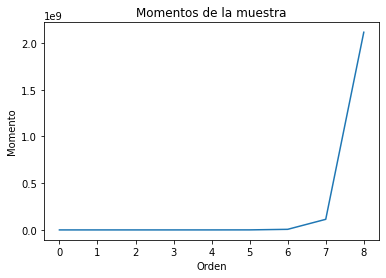

Momento 1: 0.0
Momento 2: 17.502591646373205
Momento 3: 103.37054530859633
Momento 4: 1608.2792089120076
Momento 5: 22339.954918817366
Momento 6: 365526.72136279236
Momento 7: 6282206.564684805
Momento 8: 113403994.53562641
Momento 9: 2115308783.459445

Función generadora de momentos empírica:
Momento 1: 192611190.70805597
Momento 2: 5.44811324273024e+19
Momento 3: 2.3861757922978844e+31
Momento 4: 1.171035259887775e+43
Momento 5: 6.00849201395174e+54
Momento 6: 3.1439409879653134e+66
Momento 7: 1.659796593665862e+78
Momento 8: 8.798757323931228e+89
Momento 9: 4.6732718501643673e+101


In [26]:
# Calcular la función generadora de momentos empírica
def empirical_mgf(sample, t):
    n = len(sample)
    return np.mean(np.exp(t * sample))

# Calcular los momentos de la muestra para comparación
print('Momentos de la muestra:')
momts = [moment(sample, i) for i in range(1, 10)]
plt.plot(momts)
plt.title('Momentos de la muestra')
plt.xlabel('Orden')
plt.ylabel('Momento')
plt.show()

for i in range(1, 10):
    print(f'Momento {i}: {moment(sample, i)}')

# Calcular la función generadora de momentos empírica para comparación
print('\nFunción generadora de momentos empírica:')
for i in range(1, 10):
    print(f'Momento {i}: {empirical_mgf(sample, i)}')

In [27]:
# Ajustar la distribución exponencial a los datos con MLE
params = expon.fit(sample)
dist = expon(*params)

# Obtener el parámetro de tasa
lmbda = 1 / params[1]

# Calcular la función generadora de momentos empírica para comparación
def exp_mgf(t, lmbda):
    return lmbda / (lmbda - t)

# Calcular los momentos de la muestra para comparación
print('Momentos de la muestra:')
for i in range(1, 5):
    print(f'Momento {i}: {moment(sample, i)}')

# Calcular la función generadora de momentos empírica para comparación
print('\nFunción generadora de momentos empírica:')
for i in range(1, 5):
    print(f'Momento {i}: {exp_mgf(i, lmbda)}')

Momentos de la muestra:
Momento 1: 0.0
Momento 2: 17.502591646373205
Momento 3: 103.37054530859633
Momento 4: 1608.2792089120076

Función generadora de momentos empírica:
Momento 1: -0.35333813330141944
Momento 2: -0.15014337646657397
Momento 3: -0.09532478907990881
Momento 4: -0.06982947189006122


In [28]:
params

(0.36000000000000004, 3.8301502321770005)

# 2. Otras transformaciones

data_Alzira.txt
data_Artana.txt
data_Llutxent.txt
data_Montan.txt
Valores:      1.335547833276586 0.7973490934836956 0.3074846997479607 3.332204510175204


(array([0.98117133, 0.32193979, 0.20228475, 0.27498083, 0.44836776,
        0.40276338, 0.37025333, 0.21176685, 0.06953538, 0.02302795]),
 array([0.3074847 , 0.60995668, 0.91242866, 1.21490064, 1.51737262,
        1.8198446 , 2.12231659, 2.42478857, 2.72726055, 3.02973253,
        3.33220451]),
 <BarContainer object of 10 artists>)

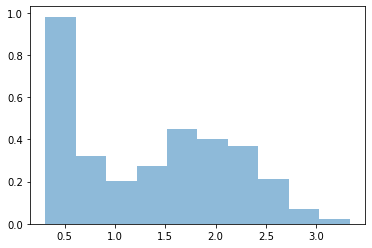

In [29]:
sample = []

for i, file in enumerate(os.listdir(path)):
    
    print(file)
    df = pd.read_csv(path + file, sep="\t", encoding='ISO-8859-1')    
    df['Fecha'] = pd.to_datetime(df['FECHA'], format='%d/%m/%Y')
    inicio, fin = fechas[i]
    df = df[(df['Fecha']>= inicio) & (df['Fecha']<= fin)]
    df['Veloc.'] = df['Veloc.'].astype('str').str.replace(',', '.').astype('float')
    sample.extend(df['Veloc.'].to_list())

sample = 3.6* np.array(sample, dtype='float') + 1
sample = np.log(sample[~np.isnan(sample)])

print('Valores:     ', sample.mean(), sample.std(), sample.min(), sample.max())

# Crear un histograma de la muestra
plt.hist(sample, density=True, alpha=0.5, label='Muestra')

norm:
    params = (1.335547833276586, 0.7973490934836956)
    p-value = 0.000
expon:
    params = (0.3074846997479607, 1.0280631335286252)
    p-value = 0.000
gamma:
    params = (25.43220456928505, -2.688551550364024, 0.15802108194945677)
    p-value = 0.000
beta:
    params = (1.416309354315783, 2.133452374285465, 0.0035609893986846873, 3.3346466244575255)
    p-value = 0.000


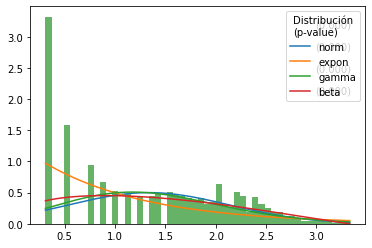

In [30]:
# Lista de distribuciones para ajustar
distributions = [norm, expon, gamma, beta]

# Parámetros de ajuste y p-values para cada distribución
params = []
p_values = []

# Ajuste cada distribución a los datos y calcule los parámetros y p-values
for distribution in distributions:
    # Ajuste la distribución a los datos
    params_dist = distribution.fit(sample)
    # Calcule el p-value de la distribución ajustada
    _, p_value = kstest(sample, distribution.cdf, args=params_dist)
    # Agregue los parámetros y p-values a la lista
    params.append(params_dist)
    p_values.append(p_value)

# Imprima los resultados
for i in range(len(distributions)):
    print('{}:\n    params = {}\n    p-value = {:.3f}'.format(distributions[i].name, params[i], p_values[i]))

# Trace un histograma de los datos de muestra
plt.hist(sample, bins=50, density=True, alpha=0.6, color='g')

# Trace cada distribución ajustada
for i, distribution in enumerate(distributions):
    # Cree un vector de x para trazar la distribución ajustada
    x = np.linspace(sample.min(), sample.max(), 1000)
    # Trace la distribución ajustada
    plt.plot(x, distribution.pdf(x, *params[i]), label=distribution.name)
    # Agregue el p-value a la leyenda
    plt.legend(title='Distribución\n(p-value)', loc='best')
    plt.annotate('({:.3f})'.format(p_values[i]), xy=(0.85, 0.9-i*0.1), xycoords='axes fraction')

plt.show()

data_Alzira.txt
data_Artana.txt
data_Llutxent.txt
data_Montan.txt


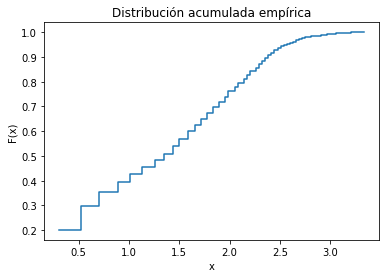

In [31]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

sample = []

for i, file in enumerate(os.listdir(path)):
    
    print(file)
    df = pd.read_csv(path + file, sep="\t", encoding='ISO-8859-1')    
    df['Fecha'] = pd.to_datetime(df['FECHA'], format='%d/%m/%Y')
    inicio, fin = fechas[i]
    df = df[(df['Fecha']>= inicio) & (df['Fecha']<= fin)]
    df['Veloc.'] = df['Veloc.'].astype('str').str.replace(',', '.').astype('float')
    sample.extend(df['Veloc.'].to_list())

# Convertir la lista en un arreglo de NumPy y eliminar los valores NaN
sample = 3.6* np.array(sample, dtype='float') + 1
sample = np.log(sample[~np.isnan(sample)])

# Calcular la ECDF de la muestra
ecdf = ECDF(sample)

# Evaluar la ECDF en puntos específicos
x = np.linspace(min(sample), max(sample), num=100)
y = ecdf(x)

# Plotear la ECDF
import matplotlib.pyplot as plt
plt.step(x, y)
plt.title('Distribución acumulada empírica')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()
